# Challenge 1

_Plot domestic total gross over time._

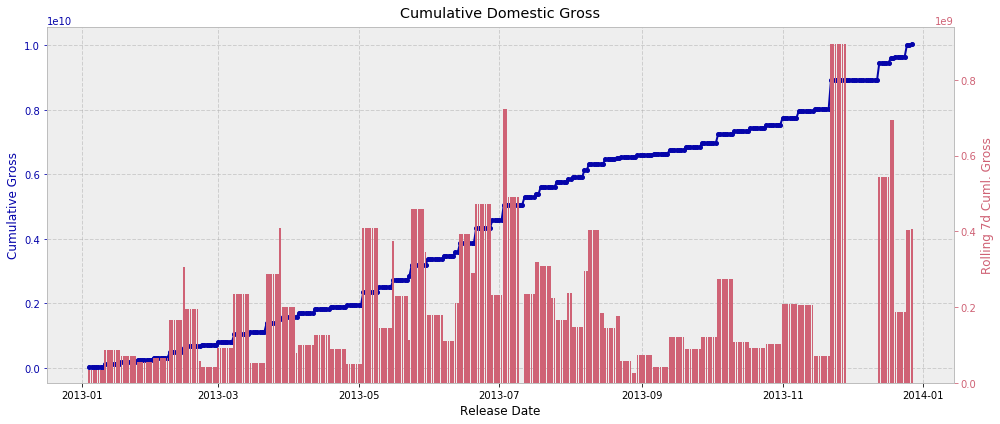

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

dtypes = {'Rating': 'category'}
path = ('https://raw.githubusercontent.com/thisismetis/nyc18_ds14/master/'
        'challenges/challenges_data/2013_movies.csv?'
        'token=AX_7hAZPtaNF47J56tL-vw7S8rOi1ClLks5aae6QwA%3D%3D')

df = pd.read_csv(path, dtype=dtypes, parse_dates=['ReleaseDate'], 
                 date_parser=lambda dt: pd.datetime.strptime(dt, '%Y-%m-%d %H:%M:%S'))
df.columns = df.columns.str.lower()

daily_gross = df.groupby('releasedate')['domestictotalgross'].sum().asfreq('D')
gross_tseries = pd.DataFrame({'Cumulative Gross': daily_gross.cumsum().ffill(),
                              'Rolling 7d Cuml. Gross': daily_gross.rolling('7d').sum()})
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(gross_tseries['Cumulative Gross'], color='xkcd:royal blue')
ax.set_ylabel('Cumulative Gross', color='xkcd:royal blue')
ax.set_xlabel('Release Date')
ax.tick_params(axis='y', colors='xkcd:royal blue')
ax2 = ax.twinx()
ax2.bar(x=gross_tseries.index, height=gross_tseries['Rolling 7d Cuml. Gross'],
        color='xkcd:rose')
ax2.set_ylabel('Rolling 7d Cuml. Gross', color='xkcd:rose')
ax2.grid(False)  # 2 grids otherwise
ax2.set_title('Cumulative Domestic Gross')
ax2.tick_params(axis='y', colors='xkcd:rose')
fig.tight_layout()

# Challenge 2

_Plot runtime vs. domestic total gross._

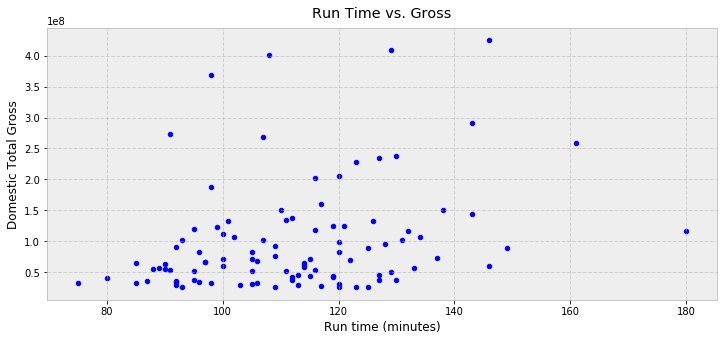

In [32]:
df.plot.scatter(x='runtime', y='domestictotalgross', figsize=(12, 5))
plt.xlabel('Run time (minutes)')
plt.ylabel('Domestic Total Gross')
plt.title('Run Time vs. Gross');

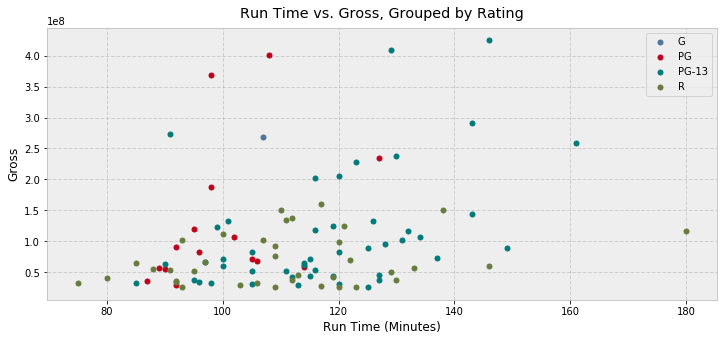

In [35]:
grouped = df.groupby('rating')
fig, ax = plt.subplots(figsize=(12, 5))
for name, group in grouped:
    ax.plot(group['runtime'], group['domestictotalgross'], 
            marker='o', linestyle='', ms=5, label=name)
ax.set_xlabel('Run Time (Minutes)')
ax.set_ylabel('Gross')
ax.set_title('Run Time vs. Gross, Grouped by Rating')
ax.legend();

# Challenge 3

_Group your data by Rating and find the average runtime and domestic total gross at each level of Rating._

In [49]:
grouped[['runtime', 'domestictotalgross']].mean().astype({'domestictotalgross': np.int64})

,runtime,domestictotalgross
rating,,
G,107.0000,268492764
PG,99.9333,131135716
PG-13,117.5106,111449769
R,110.7297,69892429


# Challenge 4

_Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross._

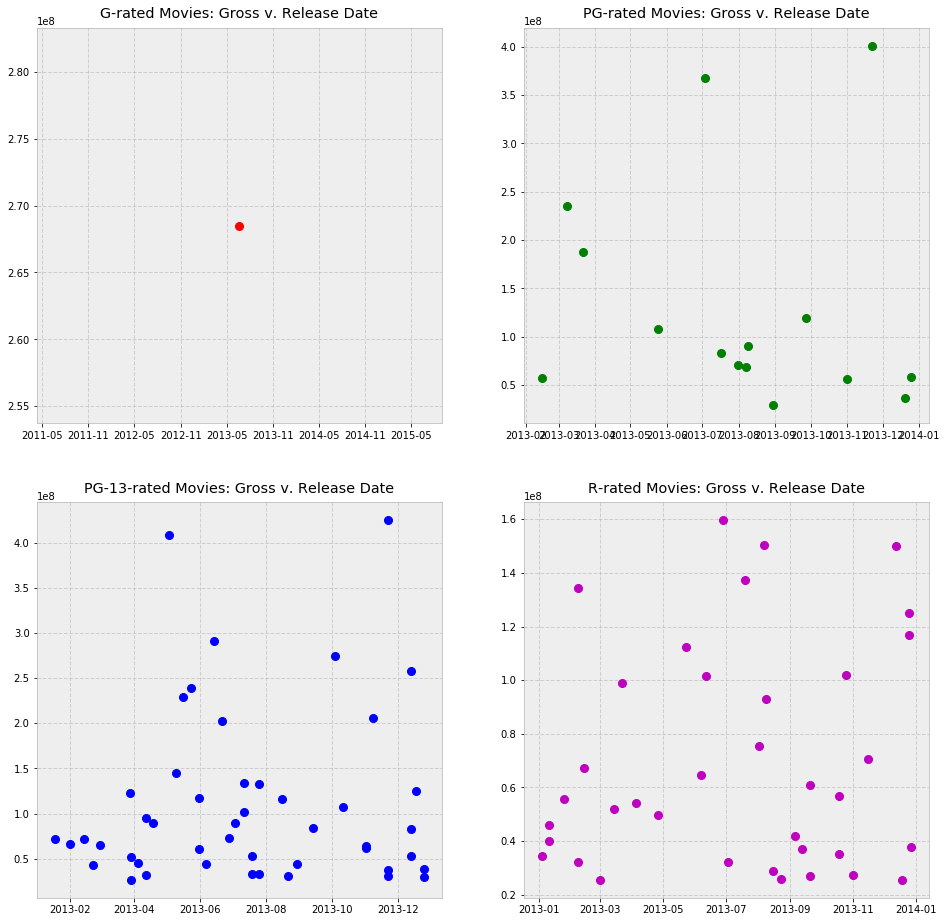

In [108]:
# TODO: date formatting
n = df['rating'].nunique()
fig, ax = plt.subplots(2, 2, figsize=(16,16))
f_ax = [a for subax in ax for a in subax]  # flatten `ax`
for (i, (label, frame)), color in zip(enumerate(grouped), list('rgbm')):
    f_ax[i].plot(frame['releasedate'], frame['domestictotalgross'], linestyle='',
                 color=color, ms=8)
    f_ax[i].set_title('{rtg}-rated Movies: Gross v. Release Date'.format(rtg=label))

In [72]:
# We only have 1 G-rated movie?
df['rating'].value_counts()

PG-13    47
R        37
PG       15
G         1
Name: rating, dtype: int64

# Challenge 5

_What director in your dataset has the highest gross per movie?_

In [82]:
direcs = df.groupby('director')['domestictotalgross'].mean()
direcs.argmax()

'Francis Lawrence'

In [94]:
direcs.nlargest(3)

director
Francis Lawrence          424668047
Shane Black               409013994
Chris BuckJennifer Lee    400738009
Name: domestictotalgross, dtype: int64

# Challenge 6

_Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.  Title of graph should include: Mean Domestic Total Gross by Month in 2013.  Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."_

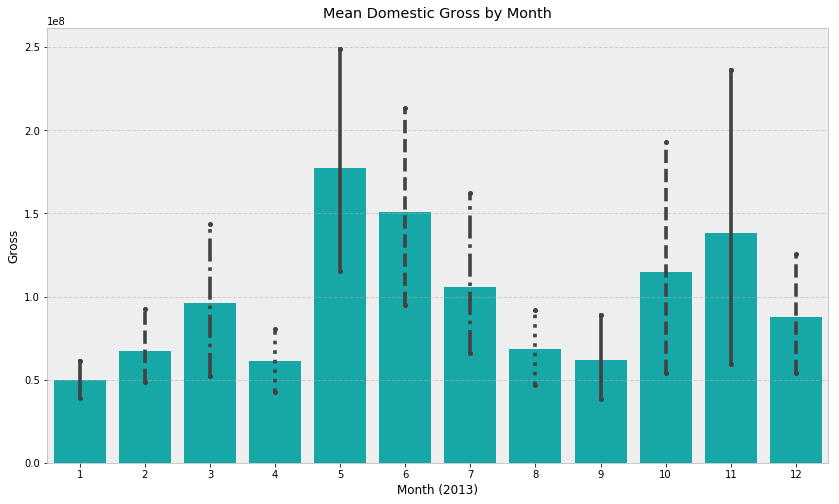

In [112]:
import seaborn as sns

_, __ = plt.subplots(figsize=(14,8))
ax = sns.barplot(x=df['releasedate'].dt.month, 
                 y=df['domestictotalgross'], data=df, color='c')
ax.set_title('Mean Domestic Gross by Month')
ax.set_ylabel('Gross')
ax.set_xlabel('Month (2013)');